In [1]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# additional lib
import function as fn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

In [2]:
# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# pycaret
import pycaret

In [3]:
df = pd.read_csv('D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\clean_data.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
3735,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3736,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3737,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3738,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


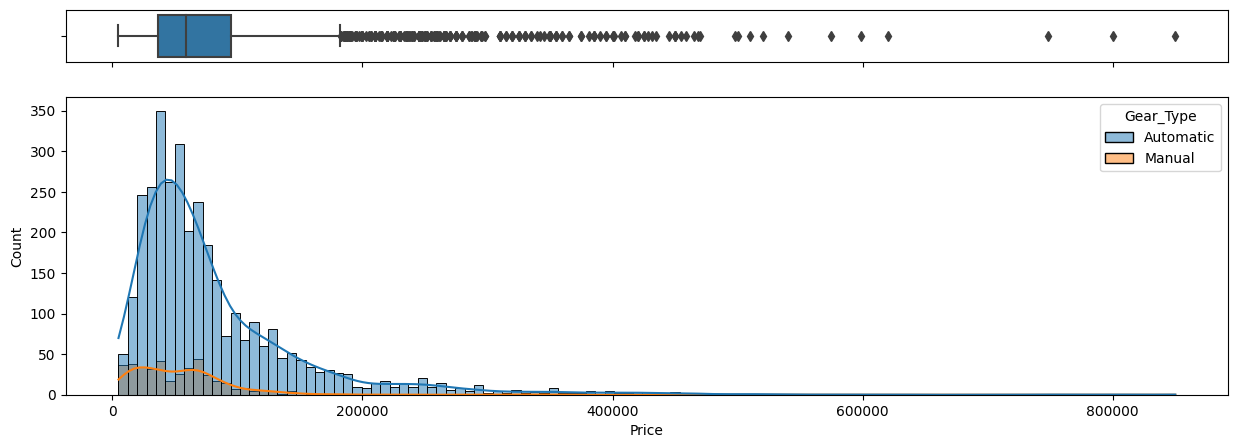

In [4]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))

# add graph
sns.boxplot(data=df, x='Price', ax=ax_box)
sns.histplot(data=df, x='Price', kde=True, ax=ax_hist, hue='Gear_Type')

# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [5]:
df.Price.describe()

count      3740.000000
mean      79613.078342
std       72728.051902
min        5000.000000
25%       36500.000000
50%       59000.000000
75%       95000.000000
max      850000.000000
Name: Price, dtype: float64

In [6]:
df.nsmallest(20, columns='Price')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
456,Accent,Dammam,Hyundai,Manual,Saudi,Standard,2005,1.5,294602,5000
1754,Suburban,Aseer,GMC,Automatic,Saudi,Semi Full,1990,3.5,140000,5000
2038,Expedition,Al-Medina,Ford,Automatic,Saudi,Semi Full,2003,5.4,400000,5000
2331,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2006,3.6,380000,5000
41,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
1079,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,5500
3612,Optima,Taef,Kia,Manual,Other,Standard,2006,1.3,290000,6000
1136,Other,Jeddah,Honda,Manual,Saudi,Standard,2011,1.0,4200,6500
13,Sunny,Riyadh,Nissan,Manual,Saudi,Standard,2011,1.4,290,7000
173,D'max,Jeddah,Suzuki,Manual,Other,Full,2001,1.0,1000,7000


In [7]:
df.nlargest(20, columns='Price')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2352,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
3126,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
2851,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
1408,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
3108,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
2386,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,5.0,26000,575000
2073,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2020,5.0,36000,540000
1920,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2019,5.6,36000,520000
1678,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,3.0,11500,510000
2030,Camargue,Dammam,Rolls-Royce,Automatic,Saudi,Full,1990,6.7,5000,500000


In [8]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3740.000000,3740.000000,3740.000000,3740.000000
mean,2014.829679,3.187567,128656.366578,79613.078342
std,5.075427,1.461262,110962.314844,72728.051902
min,1963.000000,1.000000,100.000000,5000.000000
25%,2013.000000,2.000000,49000.000000,36500.000000
50%,2016.000000,2.700000,104000.000000,59000.000000
75%,2018.000000,4.000000,183000.000000,95000.000000
max,2021.000000,9.000000,900000.000000,850000.000000


In [9]:
cat = df.select_dtypes(object).columns

# check initial info of data
pd.DataFrame({
    'column': df[cat].columns.values,
    'type': df[cat].dtypes.values,
    'n_unique': df[cat].nunique().values,
    'min': df[cat].min().values,
    'max': df[cat].max().values,
    'sample_unique': [df[col].sort_values().unique() for col in df[cat].columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,317,2,i40,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, Beetle, Bentayga, Blazer, Bus County, Bus Urvan, C, C200, C300, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayman, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Countryman, Coupe, Coupe S, Cressida, Creta, Cruze, D'max, D-MAX, DB9, Daily, ...]"
1,Region,object,27,Abha,Yanbu,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,object,56,Aston Martin,Škoda,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, Suzuki, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,object,2,Automatic,Manual,"[Automatic, Manual]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,Full,Standard,"[Full, Semi Full, Standard]"


In [31]:
tp = df.Type.value_counts()
tp.nlargest(10)

Type
Accent          146
Land Cruiser    146
Camry           145
Hilux           117
Sonata          109
Taurus          102
Elantra          99
Tahoe            98
Yukon            91
Corolla          79
Name: count, dtype: int64

In [32]:
tp.nsmallest(10)

Type
Discovery    1
Stinger      1
Coaster      1
Z370         1
Montero2     1
Bentayga     1
L300         1
Carens       1
SRT          1
K5           1
Name: count, dtype: int64

In [22]:
# data spliting

train, test = train_test_split(
    df,
    test_size = 0.20,
    random_state = 7
)

print(train.shape, test.shape)

(2808, 10) (703, 10)


In [23]:
# setup
from pycaret.regression import *

setup(
    # general setup
    data=train, 
    train_size=0.9,
    verbose=True,

    # data wrangling
    preprocess=True,
    
    # # feature selection
    # ignore_features=['Region', 'Origin']
)

,Description,Value
0,Session id,667
1,Target,Price
2,Target type,Regression
3,Original data shape,"(2808, 10)"
4,Transformed data shape,"(2808, 15)"
5,Transformed train set shape,"(2527, 15)"
6,Transformed test set shape,"(281, 15)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,6


In [24]:
get_config('dataset_transformed')

,Type,Region,Make,Gear_Type,Origin_Saudi,Origin_Other,Origin_Gulf Arabic,Origin_Unknown,Options_Standard,Options_Full,Options_Semi Full,Year,Engine_Size,Mileage,Price
3694,49875.345359,66263.352273,45959.662277,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1989.0,2.4,249.0,11000
1180,66152.549782,61883.244253,62544.567177,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.4,205.0,30000
874,54293.017023,61883.244253,45821.156069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2011.0,2.4,186000.0,25000
1231,52381.519172,49784.932962,45959.662277,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2001.0,2.7,546473.0,14000
1832,64511.239152,66263.352273,42524.927679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,3.5,172000.0,68000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,89925.650382,66263.352273,66240.740681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,5.3,287928.0,58000
17,62212.925757,60504.722327,63024.192589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2021.0,1.5,3400.0,42000
2203,107806.022384,64585.243212,71460.199005,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,8.0,228000.0,112000
2751,73597.283323,66263.352273,71460.199005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2015.0,2.7,310.0,40000


In [25]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\ariad\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Engine_Size', 'Mileage'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Type', 'Region', 'Make',
                                             'Gear_Type', 'Origin', 'Options'],
                                    transformer=SimpleImputer(strategy='most_frequen...
Manual       1
NaN         -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Origin', 'Options'],
                                    transformer=OneHotEncoder(cols=['Origin',
                                                                    'Options'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Type', 'Region', 'Make'],
                                    transformer=TargetEncoder(cols=['Type',
                                                                    'Region',
                                                                    'Make'],
                                                              handle_missing='return_nan')))])

In [26]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,10387.4660,258872733.4907,15900.8977,0.8432,0.2802,0.2075,0.4140
et,Extra Trees Regressor,10578.5298,278399325.1982,16500.1437,0.8323,0.2931,0.2203,0.5060
rf,Random Forest Regressor,10873.9282,291431109.3204,16878.0355,0.8240,0.2963,0.2210,0.4750
gbr,Gradient Boosting Regressor,11346.9323,297627973.6087,17050.9881,0.8200,0.2903,0.2255,0.3420
dt,Decision Tree Regressor,13499.0509,460596065.9848,21369.4959,0.7190,0.3639,0.2635,0.2780
ridge,Ridge Regression,16752.7397,556268585.7641,23470.2627,0.6612,0.4796,0.3920,0.2790
lar,Least Angle Regression,16754.1208,556307975.4971,23471.1669,0.6612,0.4820,0.3920,0.3250
llar,Lasso Least Angle Regression,16753.1663,556282362.6995,23470.5921,0.6612,0.4780,0.3920,0.3050
lasso,Lasso Regression,16753.1602,556282362.9586,23470.5920,0.6612,0.4779,0.3920,0.2930
lr,Linear Regression,16753.9685,556306065.2684,23471.1205,0.6612,0.4820,0.3920,0.7160


LGBMRegressor(n_jobs=-1, random_state=667)

In [27]:
model = create_model('lightgbm', return_train_score=True)
model

LGBMRegressor(n_jobs=-1, random_state=667)

In [28]:
predict_model(estimator=model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,10461.1315,235648609.6665,15350.8505,0.8576,0.2603,0.1993


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,prediction_label
1639,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2017,2.5,61000,77000,71136.565453
1539,Cerato,Jeddah,Kia,Automatic,Other,Full,2016,2.0,89000,40000,49075.651137
3543,Silverado,Hail,Chevrolet,Automatic,Saudi,Semi Full,2016,5.3,179000,95000,79706.060861
3113,Bus Urvan,Dammam,Nissan,Manual,Saudi,Standard,2016,2.5,106000,65000,45623.703693
315,Rio,Riyadh,Kia,Automatic,Saudi,Semi Full,2018,2.0,85000,30000,55468.522851
...,...,...,...,...,...,...,...,...,...,...,...
1915,Patrol,Al-Ahsa,Nissan,Manual,Saudi,Semi Full,2004,4.8,350000,25000,28040.106319
3269,Accent,Dammam,Hyundai,Automatic,Saudi,Standard,2017,1.4,61000,34000,31354.256121
1371,Yaris,Dammam,Toyota,Automatic,Saudi,Standard,2016,1.5,190000,26000,29400.390552
3420,Expedition,Dammam,Ford,Automatic,Saudi,Full,2016,3.6,265000,115000,64475.970564


In [29]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…